# $\gamma-\gamma$ 符合

## 关联矩阵

In [1]:
TFile *ipf = new TFile("../data/ggc.root", "read");
TTree *tree = (TTree*)ipf->Get("tree");
TH2D *hgg = (TH2D*)ipf->Get("hgg");
TCanvas *c1 = new TCanvas;

In [2]:
int peaks(TH1 *h, Double_t thres = 0.05, int backsub = 0) {
    TSpectrum *spectrum =  new TSpectrum(500);
    if (!spectrum) return -1;

    TH1 *hb = nullptr;
    if (backsub) {
        hb = (TH1F*)spectrum->Background(h, 80, "same");
        h->Add(h, hb, 1, -1);
    }


    Int_t foundNum = spectrum->Search(h, 2, "nodraw", thres);

    TPolyMarker *pm = (TPolyMarker*)h->GetListOfFunctions()->FindObject("TPolyMarker");
    pm->SetMarkerStyle(32);
    pm->SetMarkerColor(kGreen);
    pm->SetMarkerSize(0.4);

    Double_t *xPeaks = spectrum->GetPositionX();
    Double_t *yPeaks = spectrum->GetPositionY();
    for (int i = 0; i != foundNum; ++i) {
        TLatex *tex = new TLatex(xPeaks[i], yPeaks[i], TString::Format("%.0lf", xPeaks[i]));
        tex->SetTextFont(13);
        tex->SetTextSize(14);
        tex->SetTextAlign(12);
        tex->SetTextAngle(90);
        tex->SetTextColor(kRed);
        h->GetListOfFunctions()->Add(tex);
//         tex->Draw();
    }
    h->Draw();

    return 0;
}

### 二维关联矩阵

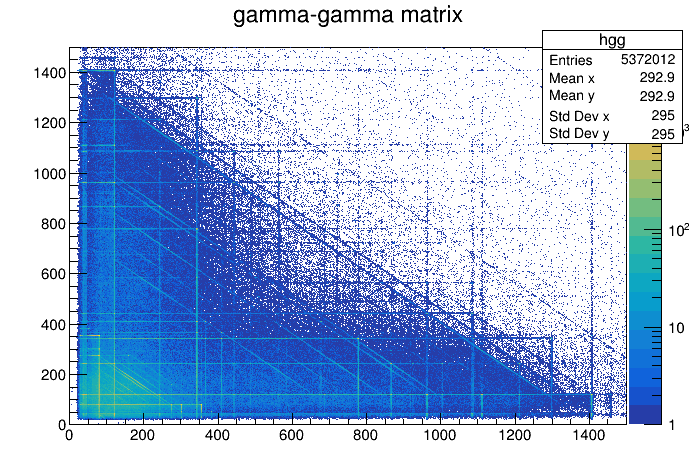

In [3]:
hgg->Draw("colz");
c1->SetLogz();
c1->Draw();

### 总投影谱

In [4]:
%jsroot on
TH1D *hpt = hgg->ProjectionX();
peaks(hpt);
c1->Draw();

可能的 $\gamma$ 能量为 40, 80, 122, 244, (276, 302,) 344, (356, 412,) 444, 778, 868, 964, 1112, 1408

## 开窗谱

### 40

In [5]:
tree->Draw("aex>>h40(1500, 0, 1500)", "abs(aey-40)<3");
tree->Draw("aex>>h40b(1500, 0, 1500)", "abs(aey-35)<3");
TH1 *h40 = (TH1*)gDirectory->Get("h40");
TH1 *h40b = (TH1*)gDirectory->Get("h40b");
h40->Add(h40, h40b, 1, -1);
peaks(h40);
c1->Draw();

|    | 40    | 80    |   122    | 244      | 344   | 444      | 778   | 868      | 964      | 1112     | 1408     |
| --- | ---   | ---   |   ---    | ---      | ---   | ---      | ---   | ---      | ---      | ----     | ----     |
| 40  |$\times$|$\times$|$\checkmark$|$\checkmark$|$\times$|$\checkmark$|$\times$|$\checkmark$|$\checkmark$|$\checkmark$|$\checkmark$|


### 80

In [6]:
tree->Draw("aex>>h80(1500, 0, 1500)", "abs(aey-80)<3");
tree->Draw("aex>>h80b(1500, 0, 1500)", "abs(aey-90)<3");
TH1 *h80 = (TH1*)gDirectory->Get("h80");
TH1 *h80b = (TH1*)gDirectory->Get("h80b");
h80->Add(h80, h80b, 1, -1);
peaks(h80);
c1->Draw();

|    | 40    | 80    |   122    | 244      | 344   | 444      | 778   | 868      | 964      | 1112     | 1408     |
| --- | ---   | ---   |   ---    | ---      | ---   | ---      | ---   | ---      | ---      | ----     | ----     |
| 80  |$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|

显然80是$^{133}$Ba的谱，应该和276,302,356关联，之后的分析可以去掉80

### 122

In [7]:
tree->Draw("aex>>h122(1500, 0, 1500)", "abs(aey-122)<3");
tree->Draw("aex>>h122b(1500, 0, 1500)", "abs(aey-130)<3");
TH1 *h122 = (TH1*)gDirectory->Get("h122");
TH1 *h122b = (TH1*)gDirectory->Get("h122b");
h122->Add(h122, h122b, 1, -1);
peaks(h122);
c1->Draw();

|    | 40       |  122  | 244      | 344   | 444      | 778   | 868      | 964      | 1112     | 1408     |
| --- | ---      |   --- | ---      | ---   | ---      | ---   | ---      | ---      | ----     | ----     |
| 122 |$\checkmark$|$\times$|$\checkmark$|?     |$\checkmark$|$\times$|$\checkmark$|$\checkmark$|$\checkmark$|$\checkmark$|


### 244

In [8]:
tree->Draw("aex>>h244(1500, 0, 1500)", "abs(aey-244)<3", "goff");
tree->Draw("aex>>h244b(1500, 0, 1500)", "abs(aey-255)<3", "goff");
TH1 *h244 = (TH1*)gDirectory->Get("h244");
TH1 *h244b = (TH1*)gDirectory->Get("h244b");
h244->Add(h244, h244b, 1, -1);
peaks(h244);
c1->Draw();

|    | 40       |  122  | 244      | 344   | 444  | 778   | 868      | 964      | 1112     | 1408     |
| --- | ---      |   --- | ---      | ---   | ---  | ---   | ---      | ---      | ----     | ----     |
| 244 |$\checkmark$|$\checkmark$|$\times$|$\times$|?    |$\times$|$\checkmark$|$\times$|$\times$|$\times$|


### 344

In [9]:
tree->Draw("aex>>h344(1500, 0, 1500)", "abs(aey-344)<3", "goff");
tree->Draw("aex>>h344b(1500, 0, 1500)", "abs(aey-335)<3", "goff");
TH1 *h344 = (TH1*)gDirectory->Get("h344");
TH1 *h344b = (TH1*)gDirectory->Get("h344b");
h344->Add(h344, h344b, 1, -1);
peaks(h344);
c1->Draw();

|    | 40    |  122  | 244    | 344   | 444  | 778       | 868   | 964   | 1112   | 1408  |
| --- | ---   |   --- | ---   | ---   | ---  | ---       | ---   | ---   | ----   | ----  |
| 344 |$\times$|$\times$|$\times$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|


### 444

In [10]:
tree->Draw("aex>>h444(1500, 0, 1500)", "abs(aey-444)<3", "goff");
tree->Draw("aex>>h444b(1500, 0, 1500)", "abs(aey-455)<3", "goff");
TH1 *h444 = (TH1*)gDirectory->Get("h444");
TH1 *h444b = (TH1*)gDirectory->Get("h444b");
h444->Add(h444, h444b, 1, -1);
peaks(h444);
c1->Draw();

|    | 40       |  122     | 244     | 344   | 444   | 778   | 868   | 964      | 1112  | 1408     |
| --- | ---      |   ---    | ---      | ---   | ---   | ---   | ---   | ---      | ----  | ----     |
| 444 |$\checkmark$|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|


### 778

In [11]:
tree->Draw("aex>>h778(1500, 0, 1500)", "abs(aey-778)<3", "goff");
tree->Draw("aex>>h778b(1500, 0, 1500)", "abs(aey-790)<3", "goff");
TH1 *h778 = (TH1*)gDirectory->Get("h778");
TH1 *h778b = (TH1*)gDirectory->Get("h778b");
h778->Add(h778, h778b, 1, -1);
peaks(h778);
c1->Draw();

|    | 40       |  122     | 244     | 344   | 444   | 778   | 868   | 964      | 1112  | 1408     |
| --- | ---      |   ---    | ---      | ---   | ---   | ---   | ---   | ---      | ----  | ----     |
| 778 |$\times$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|


### 868

In [12]:
tree->Draw("aex>>h868(1500, 0, 1500)", "abs(aey-868)<3", "goff");
tree->Draw("aex>>h868b(1500, 0, 1500)", "abs(aey-880)<3", "goff");
TH1 *h868 = (TH1*)gDirectory->Get("h868");
TH1 *h868b = (TH1*)gDirectory->Get("h868b");
h868->Add(h868, h868b, 1, -1);
peaks(h868);
c1->Draw();

|    | 40       |  122     | 244     | 344   | 444   | 778   | 868   | 964      | 1112  | 1408     |
| --- | ---      |   ---    | ---      | ---   | ---   | ---   | ---   | ---      | ----  | ----     |
| 868 |$\checkmark$|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|


### 964

In [13]:
tree->Draw("aex>>h964(1500, 0, 1500)", "abs(aey-964)<3", "goff");
tree->Draw("aex>>h964b(1500, 0, 1500)", "abs(aey-975)<3", "goff");
TH1 *h964 = (TH1*)gDirectory->Get("h964");
TH1 *h964b = (TH1*)gDirectory->Get("h964b");
h964->Add(h964, h964b, 1, -1);
peaks(h964);
c1->Draw();

|    | 40       |  122     | 244     | 344   | 444   | 778   | 868   | 964      | 1112  | 1408     |
| --- | ---      |   ---    | ---      | ---   | ---   | ---   | ---   | ---      | ----  | ----     |
| 964 |$\checkmark$|$\checkmark$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|


### 1112

In [14]:
tree->Draw("aex>>h1112(1500, 0, 1500)", "abs(aey-1112)<3", "goff");
tree->Draw("aex>>h1112b(1500, 0, 1500)", "abs(aey-1125)<3", "goff");
TH1 *h1112 = (TH1*)gDirectory->Get("h1112");
TH1 *h1112b = (TH1*)gDirectory->Get("h1112b");
h1112->Add(h1112, h1112b, 1, -1);
peaks(h1112);
c1->Draw();

|    | 40       |  122     | 244     | 344   | 444   | 778   | 868   | 964      | 1112  | 1408     |
| --- | ---      |   ---    | ---      | ---   | ---   | ---   | ---   | ---      | ----  | ----     |
| 1112|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|


### 1408

In [15]:
tree->Draw("aex>>h1408(1500, 0, 1500)", "abs(aey-1408)<3", "goff");
tree->Draw("aex>>h1408b(1500, 0, 1500)", "abs(aey-1420)<3", "goff");
TH1 *h1408 = (TH1*)gDirectory->Get("h1408");
TH1 *h1408b = (TH1*)gDirectory->Get("h1408b");
h1408->Add(h1408, h1408b, 1, -1);
peaks(h1408);
c1->Draw();

|    | 40       |  122     | 244     | 344   | 444   | 778   | 868   | 964      | 1112  | 1408     |
| --- | ---      |   ---    | ---      | ---   | ---   | ---   | ---   | ---      | ----  | ----     |
| 1408|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|


## 总关联表
|    | 40       |  122     | 244     | 344   | 444   | 778   | 868   | 964      | 1112  | 1408     |
| --- | ---      |   ---    | ---      | ---   | ---   | ---   | ---   | ---      | ----  | ----     |
| 40  |$\times$|$\checkmark$|$\checkmark$|$\times$|$\checkmark$|$\times$|$\checkmark$|$\checkmark$|$\checkmark$|$\checkmark$|
| 122 |$\checkmark$|$\times$|$\checkmark$|$\times$|$\checkmark$|$\times$|$\checkmark$|$\checkmark$|$\checkmark$|$\checkmark$|
| 244 |$\checkmark$|$\checkmark$|$\times$|$\times$|$\checkmark$    |$\times$|$\checkmark$|$\times$|$\times$|$\times$|
| 344 |$\times$|$\times$|$\times$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|
| 444 |$\checkmark$|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|
| 778 |$\times$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|
| 868 |$\checkmark$|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|
| 964 |$\checkmark$|$\checkmark$|$\times$|$\times$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|
| 1112|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|
| 1408|$\checkmark$|$\checkmark$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|$\times$|






![EnergyLevel](EnergyLevel.png)